In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing dataset**

In [28]:
df=pd.read_csv("/content/processed_insurance_dataset.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [32]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Selecting feature and target

In [63]:
X = df[['smoker', 'age', 'bmi']].values   # selected top 3 features
y = df['charges'].values


In [64]:
indices = np.arange(len(X))
np.random.shuffle(indices)

X = X[indices]
y = y[indices]


Train test split

In [65]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


Normalizing training data

In [66]:
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std


Scaling target variable

In [67]:
y_mean = y_train.mean()
y_std = y_train.std()

y_train_scaled = (y_train - y_mean) / y_std


Adding bias term

In [68]:
X_train = np.c_[np.ones(len(X_train)), X_train]
X_test = np.c_[np.ones(len(X_test)), X_test]


training the model

In [69]:
weights = np.zeros(X_train.shape[1])  # bias + 3 features
learning_rate = 0.01
epochs = 4000
n = len(y_train_scaled)

cost_history = []

for _ in range(epochs):
    y_pred = X_train.dot(weights)
    error = y_pred - y_train_scaled

    gradients = (2 / n) * X_train.T.dot(error)
    weights -= learning_rate * gradients

    cost = np.mean(error ** 2)
    cost_history.append(cost)


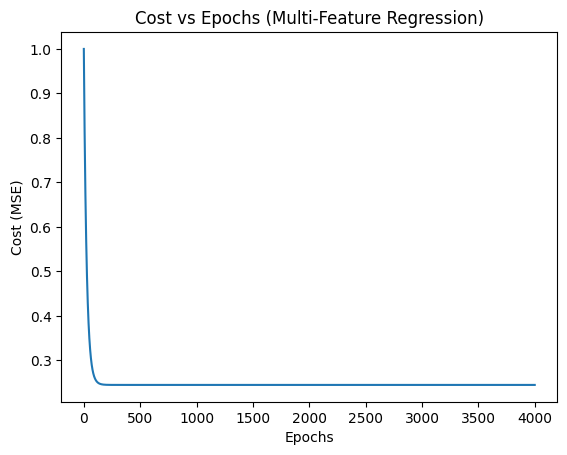

In [70]:
plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.title("Cost vs Epochs (Multi-Feature Regression)")
plt.show()


In [71]:
y_test_pred_scaled = X_test.dot(weights)
y_test_pred = y_test_pred_scaled * y_std + y_mean


Evaluation

In [72]:
mse = np.mean((y_test - y_test_pred) ** 2)
rmse = np.sqrt(mse)

r2 = 1 - np.sum((y_test - y_test_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MSE: 39988388.14309049
RMSE: 6323.63725581176
R2 Score: 0.7131484068814617


In [73]:
feature_names = ['Bias', 'Smoker', 'Age', 'BMI']

for name, w in zip(feature_names, weights):
    print(f"{name}: {w:.3f}")


Bias: 0.000
Smoker: 0.803
Age: 0.298
BMI: 0.153


In [74]:
def predict_insurance(smoker, age, bmi):
    X_new = np.array([[smoker, age, bmi]])

    # Normalize using training stats
    X_new = (X_new - X_mean) / X_std

    # Add bias
    X_new = np.c_[np.ones(X_new.shape[0]), X_new]

    # Predict (scaled)
    y_scaled = X_new.dot(weights)

    # Convert back to original scale
    y_pred = y_scaled * y_std + y_mean

    return y_pred[0]


In [75]:
print("Prediction (Non-smoker, age 30, BMI 24):",
      predict_insurance(0, 30, 24))

print("Prediction (Smoker, age 45, BMI 32):",
      predict_insurance(1, 45, 32))


Prediction (Non-smoker, age 30, BMI 24): 3920.1584543452263
Prediction (Smoker, age 45, BMI 32): 34346.786647751454
